# Setup & Imports

In [1]:
# Enhanced Exploratory Data Analysis - Customer Churn Dataset
# Comprehensive visualizations and insights

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Load raw data
df = pd.read_csv("../data/raw/churn_data.csv")

# Drop irrelevant ID
df = df.drop('customer_id', axis=1)

print(f"Dataset Shape: {df.shape}")
print(f"Overall Churn Rate: {df['churn'].mean():.2%}\n")
print(df.head())

Dataset Shape: (10000, 11)
Overall Churn Rate: 20.37%

   credit_score    country  gender  age  tenure    balance  products_number  \
0           619      India  Female   42       2       0.00                1   
1           608  Sri Lanka  Female   41       1   83807.86                1   
2           502      India  Female   42       8  159660.80                3   
3           699      India  Female   39       1       0.00                2   
4           850  Sri Lanka  Female   43       2  125510.82                1   

   credit_card  active_member  estimated_salary  churn  
0            1              1         101348.88      1  
1            0              1         112542.58      0  
2            1              0         113931.57      1  
3            0              0          93826.63      0  
4            1              1          79084.10      0  


C:\Users\piyus\AppData\Local\Temp\ipykernel_28584\1795504881.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='churn', palette='Set1')


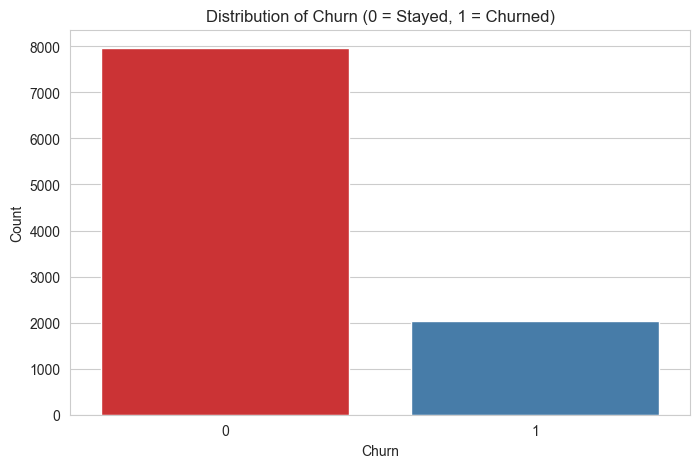

Customers who stayed: 7963 (79.6%)
Customers who churned: 2037 (20.4%)


In [2]:
# ==================== 1. Target Variable Overview ====================
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='churn', palette='Set1')
plt.title('Distribution of Churn (0 = Stayed, 1 = Churned)')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

print(f"Customers who stayed: {df['churn'].value_counts()[0]} ({df['churn'].value_counts(normalize=True)[0]:.1%})")
print(f"Customers who churned: {df['churn'].value_counts()[1]} ({df['churn'].value_counts(normalize=True)[1]:.1%})")

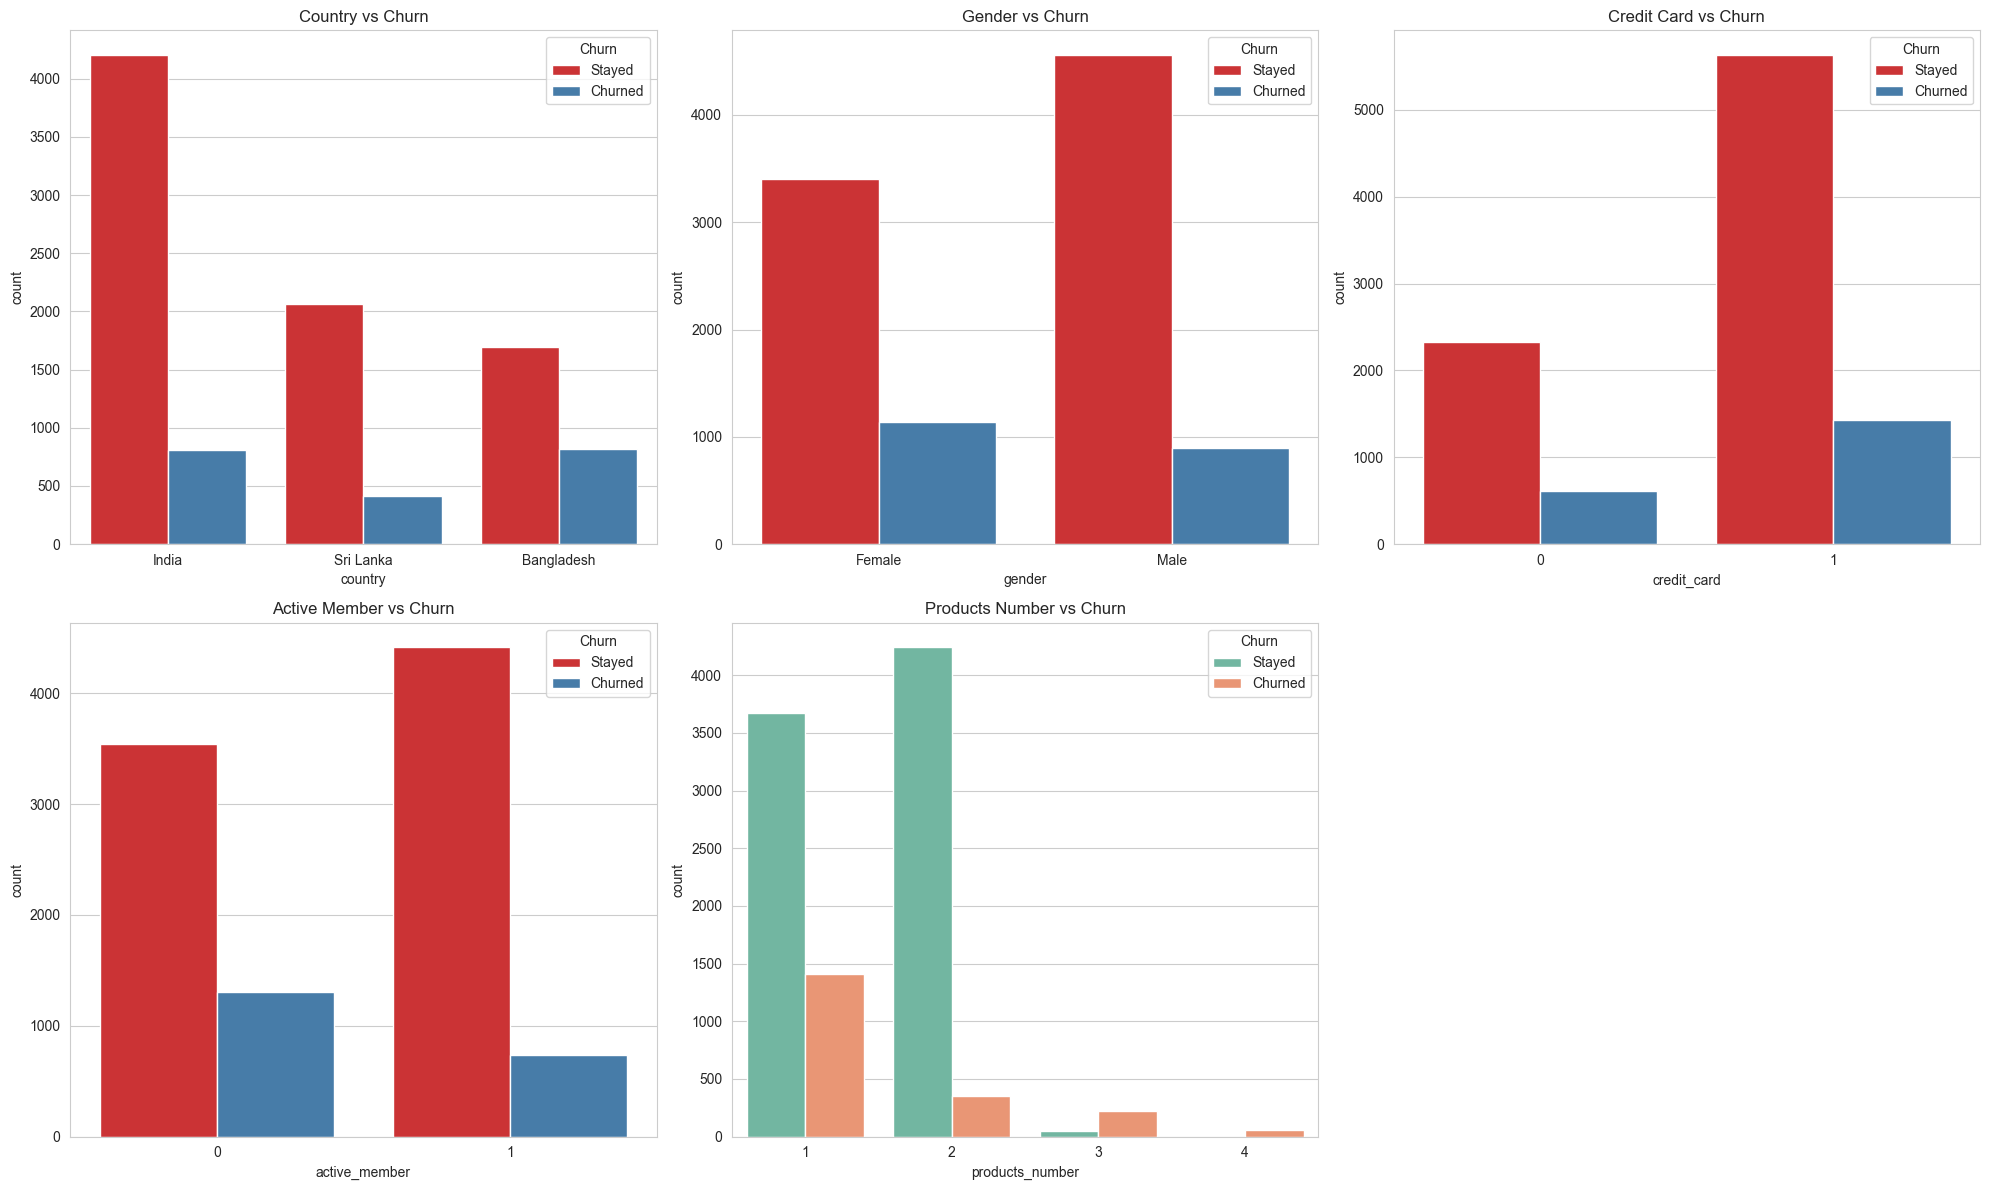


Churn Rate by Category:

Country:
country
Bangladesh    32.4%
Sri Lanka     16.7%
India         16.2%
Name: churn, dtype: object

Gender:
gender
Female    25.1%
Male      16.5%
Name: churn, dtype: object

Credit Card:
credit_card
0    20.8%
1    20.2%
Name: churn, dtype: object

Active Member:
active_member
0    26.9%
1    14.3%
Name: churn, dtype: object

Products Number:
products_number
1     27.7%
2      7.6%
3     82.7%
4    100.0%
Name: churn, dtype: object


In [3]:
# ==================== 2. Categorical Features vs Churn ====================
cat_features = ['country', 'gender', 'credit_card', 'active_member', 'products_number']

fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.ravel()

for i, col in enumerate(cat_features):
    if col == 'products_number':
        sns.countplot(data=df, x=col, hue='churn', ax=axes[i], palette='Set2')
    else:
        sns.countplot(data=df, x=col, hue='churn', ax=axes[i], palette='Set1')
    axes[i].set_title(f'{col.replace("_", " ").title()} vs Churn')
    axes[i].legend(title='Churn', labels=['Stayed', 'Churned'])

# Remove empty subplot
fig.delaxes(axes[5])
plt.tight_layout()
plt.show()

# Churn rate by category (printed)
print("\nChurn Rate by Category:")
for col in cat_features:
    if col != 'products_number':
        rates = df.groupby(col)['churn'].mean().sort_values(ascending=False)
        print(f"\n{col.replace('_', ' ').title()}:")
        print(rates.map('{:.1%}'.format))
    else:
        rates = df.groupby(col)['churn'].mean()
        print("\nProducts Number:")
        print(rates.map('{:.1%}'.format))

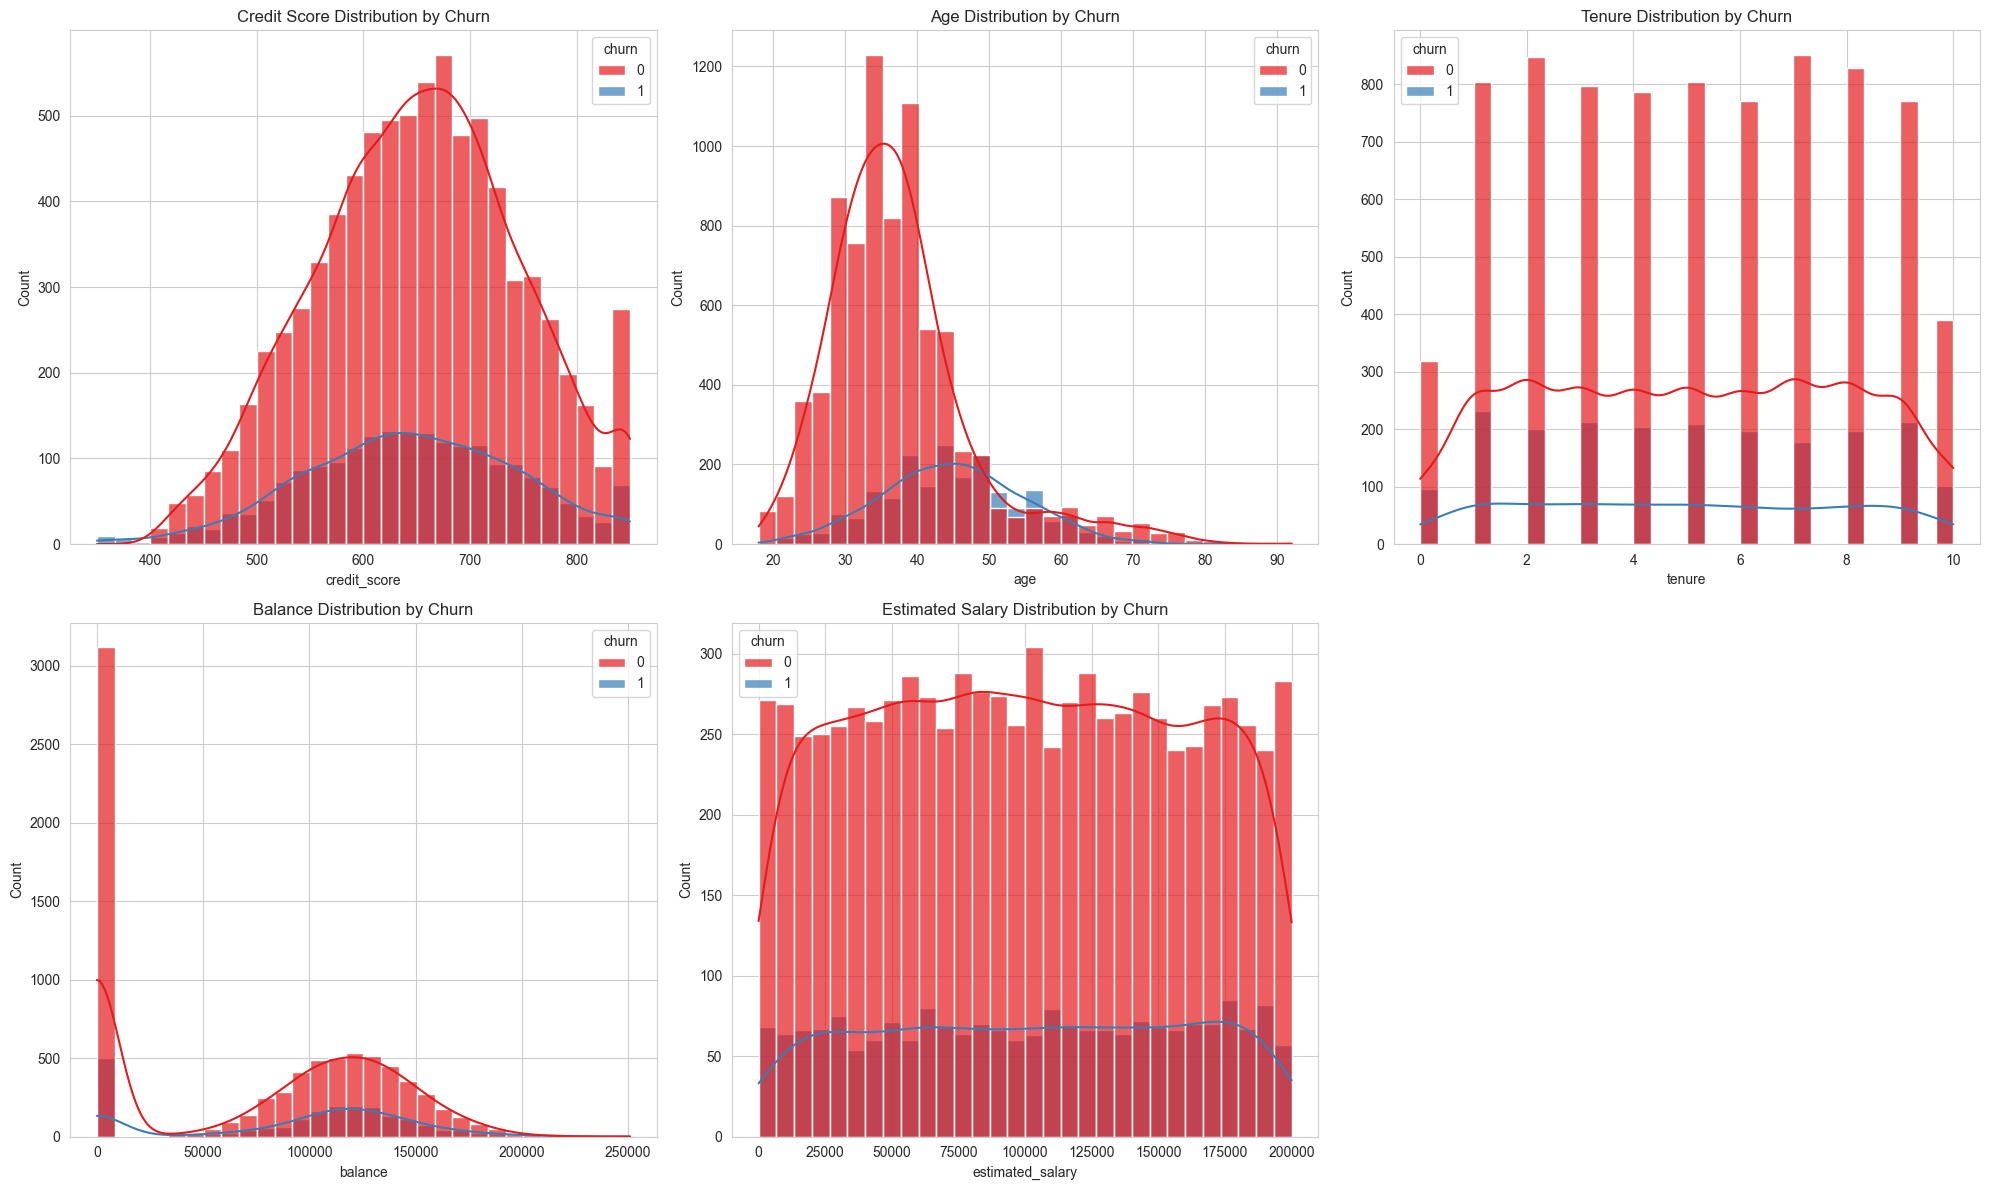

In [4]:
# ==================== 3. Numerical Feature Distributions ====================
num_features = ['credit_score', 'age', 'tenure', 'balance', 'estimated_salary']

fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.ravel()

for i, col in enumerate(num_features):
    sns.histplot(data=df, x=col, hue='churn', kde=True, bins=30, ax=axes[i], palette='Set1', alpha=0.7)
    axes[i].set_title(f'{col.replace("_", " ").title()} Distribution by Churn')

fig.delaxes(axes[5])
plt.tight_layout()
plt.show()

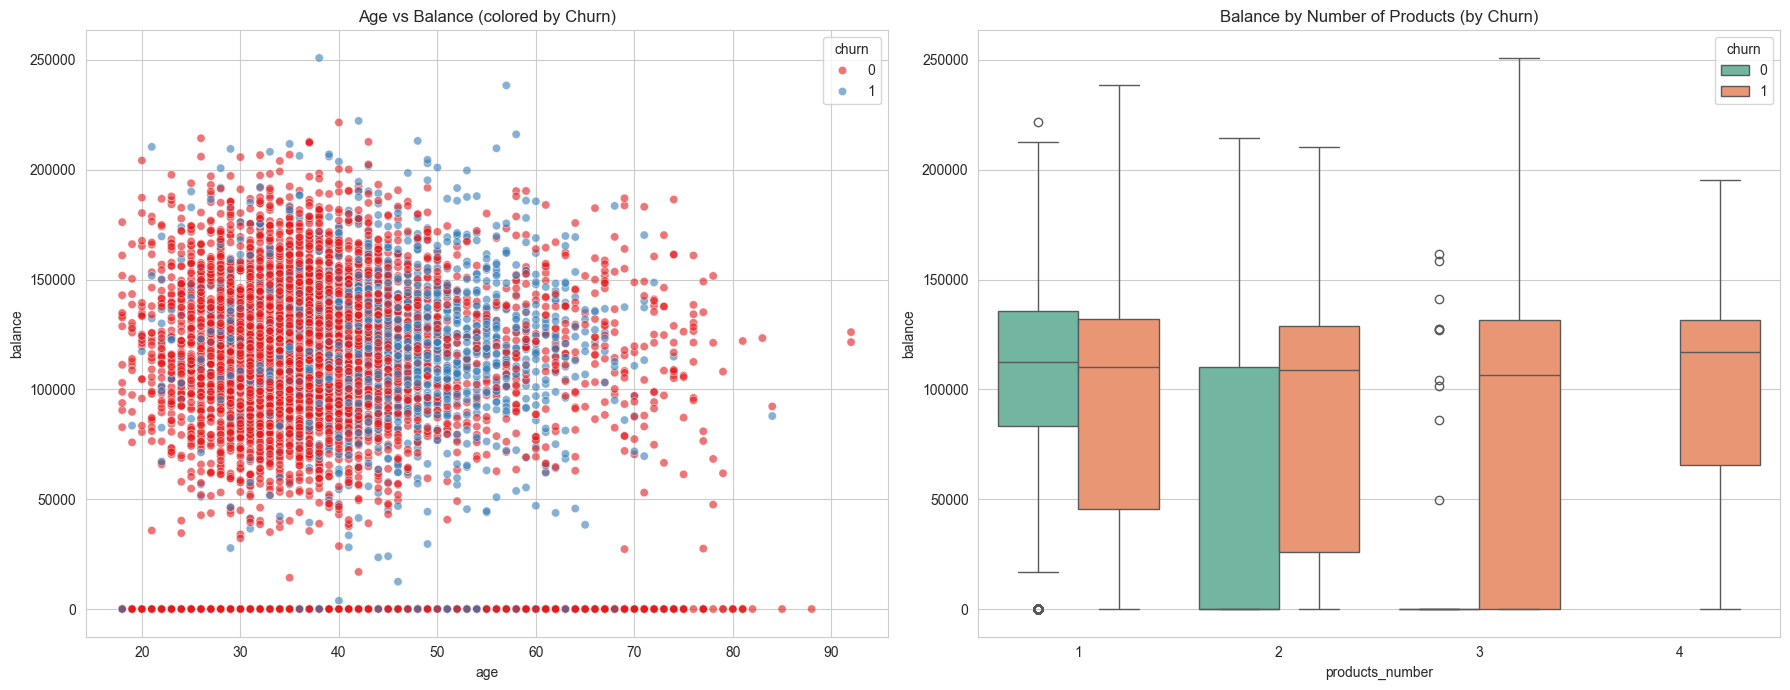

In [5]:
# ==================== 4. Key Bivariate Plots ====================
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Age vs Balance colored by churn
sns.scatterplot(data=df, x='age', y='balance', hue='churn', alpha=0.6, palette='Set1', ax=axes[0])
axes[0].set_title('Age vs Balance (colored by Churn)')

# Balance by Number of Products (boxplot)
sns.boxplot(data=df, x='products_number', y='balance', hue='churn', ax=axes[1], palette='Set2')
axes[1].set_title('Balance by Number of Products (by Churn)')

plt.tight_layout()
plt.show()

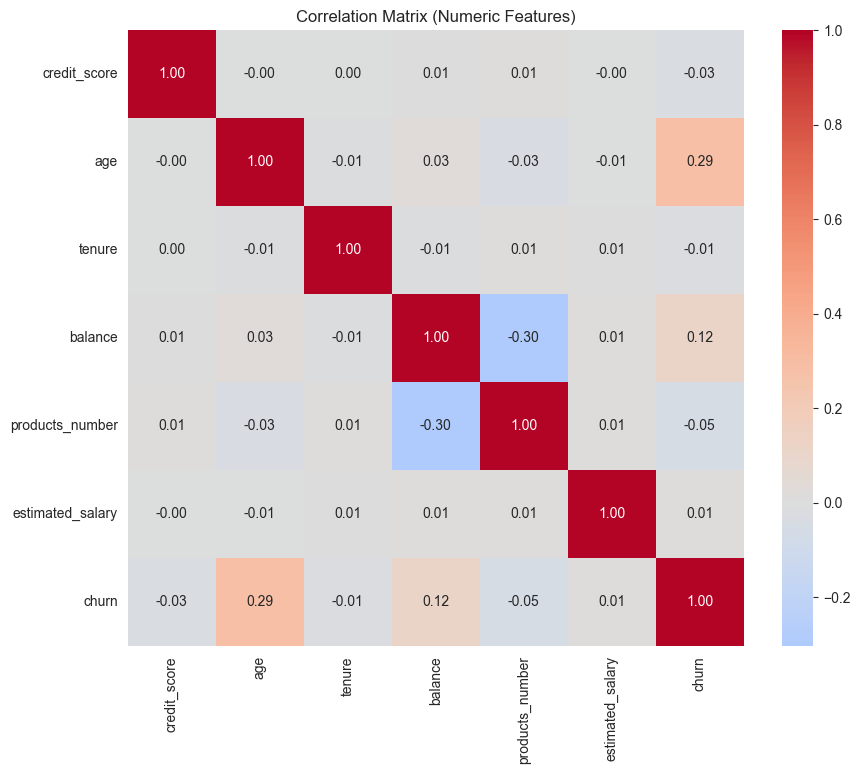

In [6]:
# ==================== 5. Correlation Heatmap ====================
plt.figure(figsize=(10, 8))
numeric_cols = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary', 'churn']
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, fmt='.2f', square=True)
plt.title('Correlation Matrix (Numeric Features)')
plt.show()

In [8]:
# ==================== Key Insights Summary ====================
print("\n" + "="*60)
print("KEY INSIGHTS FROM EXPLORATORY DATA ANALYSIS")
print("="*60)
print("• Overall churn rate: ~20.4%")
print("• Age: Strong pattern — customers aged 45–60 have much higher churn")
print("• Active Member: Inactive customers (active_member=0) churn at nearly double the rate")
print("• Products Number: Customers with 3 or 4 products churn dramatically more (especially 4!)")
print("• Country: Bangladesh has noticeably higher churn (~32%) vs India (~16%) and Sri lanka (~16%)")
print("• Gender: Females churn slightly more than males")
print("• Balance: Customers with high balance + inactive are high risk")
print("• Credit Card: Little difference — not a strong predictor")
print("• Estimated Salary & Credit Score: Weak direct relationship with churn")
print("• Recommendation: Focus retention on older, inactive, Bangladeshi customers with multiple products")
print("="*60)


KEY INSIGHTS FROM EXPLORATORY DATA ANALYSIS
• Overall churn rate: ~20.4%
• Age: Strong pattern — customers aged 45–60 have much higher churn
• Active Member: Inactive customers (active_member=0) churn at nearly double the rate
• Products Number: Customers with 3 or 4 products churn dramatically more (especially 4!)
• Country: Bangladesh has noticeably higher churn (~32%) vs India (~16%) and Sri lanka (~16%)
• Gender: Females churn slightly more than males
• Balance: Customers with high balance + inactive are high risk
• Credit Card: Little difference — not a strong predictor
• Estimated Salary & Credit Score: Weak direct relationship with churn
• Recommendation: Focus retention on older, inactive, Bangladeshi customers with multiple products
